c## 评估搜集搜集组装基因组的质量
- BUSCO 完整性测试
- contigNum统计
- contigN50统计
- genomesize统计

In [1]:
# load package
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# change work dir
import os
os.chdir(r"D:\code\github\Unified_Yeast_GEMs_Database_from_13pro")

In [2]:
# load all strain information
all_strain_info=pd.read_excel("data/strain_information/1897_strains_info.xlsx",index_col=0)
all_strain_info.head()

,ssGEM,strain,source,original_ecological_description,geographic_origin,Ploidy,type,sub_type,lg_classify,assemble_level,genome_id,genomeSize,contigNums,N50,gene_numb,remove
0,BFC,EXF-5295,1011_nature,Fermentation,Slovenia,2,natural,0,Fermentation,contig,BFC_3.re,11830106.0,1534.0,203532.0,6380.0,False
1,AGL,CBS4458,1011_nature,Wine,France,1,industrial,0,Wine,contig,AGL_2.re,12043831.0,4846.0,141324.0,6280.0,False
2,ABE,YJM434_1b,1011_nature,"Human, clinical",0,1,clinical,0,"Human, clinical",contig,ABE_5.re,12024093.0,4239.0,165966.0,6353.0,False
3,YAM,YJM453,1011_nature,"Human, clinical",0,2,clinical,0,NaN,contig,YAM.re,11826830.0,1674.0,122940.0,6385.0,False
4,BKI,DBVPG1554,1011_nature,Wine,Dalmatia,2,industrial,0,Wine,contig,BKI_2.re,11761442.0,1477.0,221563.0,6370.0,False


### 基因组组装质量contigNum评估

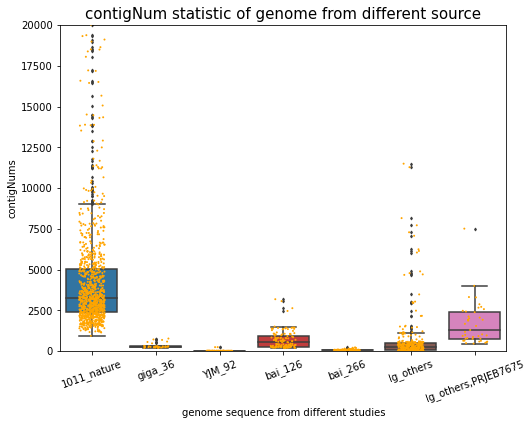

In [7]:
# boxplot: genome contigNum vs genome sources
plt.figure(figsize=(8,6))
ax = sns.boxplot(y='contigNums', x='source', data=all_strain_info,fliersize=2)
ax.set_ylim([0,20000])
# add stripplot
ax = sns.stripplot(y='contigNums', x='source', data=all_strain_info, color="orange", jitter=0.2, size=2)

# add title
plt.xlabel("genome sequence from different studies")
plt.title("contigNum statistic of genome from different source",fontsize=15)
plt.xticks(rotation=20)
# show the graph
plt.show()

### 基因组组装质量——contigN50评估

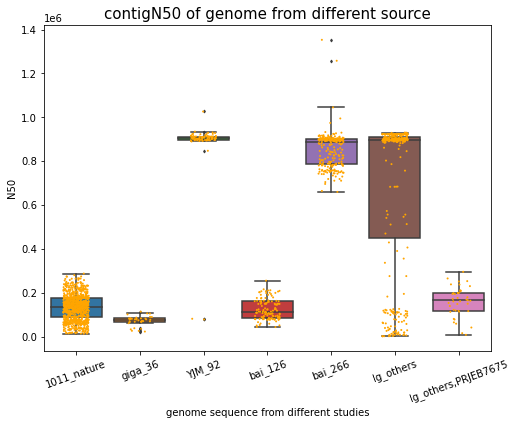

In [10]:
# boxplot: contigN50 vs genome sources
plt.figure(figsize=(8,6))
ax = sns.boxplot(y='N50', x='source', data=all_strain_info,fliersize=2)
# ax.set_ylim([0,20000])
# add stripplot
ax = sns.stripplot(y='N50', x='source', data=all_strain_info, color="orange", jitter=0.2, size=2)

# add title
plt.xlabel("genome sequence from different studies")
plt.title("contigN50 of genome from different source",fontsize=15)
plt.xticks(rotation=20)
# show the graph
plt.show()

### 基因组大小评估

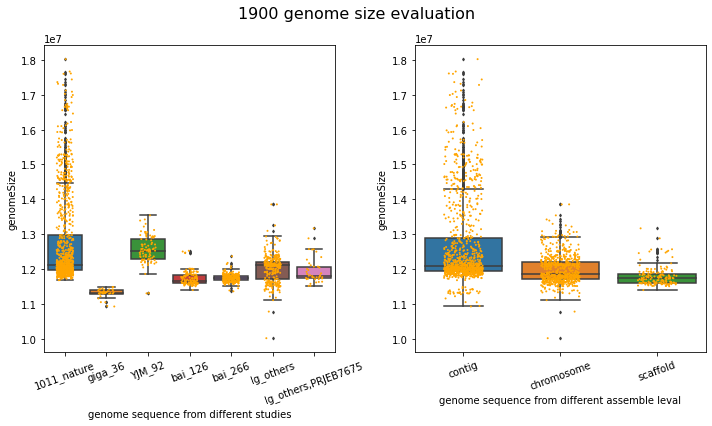

In [25]:
plt.figure(figsize=(10,6))
plt.suptitle("1900 genome size evaluation",fontsize=16)
# boxplot: genomeSize vs genome sources
plt.subplot(1,2,1)
sns.boxplot(y='genomeSize', x='source', data=all_strain_info,fliersize=2)
# add stripplot
sns.stripplot(y='genomeSize', x='source', data=all_strain_info, color="orange", jitter=0.2, size=2)
# add title
plt.xlabel("genome sequence from different studies")
# plt.title("contigN50 of genome from different source")
plt.xticks(rotation=20)

# genomeSize vs genome assemble leval
plt.subplot(1,2,2)
sns.boxplot(y='genomeSize', x='assemble_level', data=all_strain_info,fliersize=2)
# add stripplot
sns.stripplot(y='genomeSize', x='assemble_level', data=all_strain_info, color="orange", jitter=0.2, size=2)
# add title
plt.xlabel("genome sequence from different assemble leval")
# plt.title("contigN50 of genome from different source")
plt.xticks(rotation=20)

# show the graph
plt.tight_layout()
plt.show()

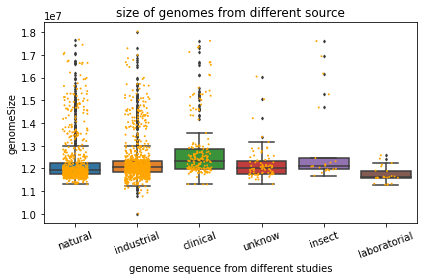

In [28]:
# genome size vs strain type
# plt.figure(figsize=())
sns.boxplot(y='genomeSize', x='type', data=all_strain_info,fliersize=2)
# add stripplot
sns.stripplot(y='genomeSize', x='type', data=all_strain_info, color="orange", jitter=0.2, size=2)
# add title
plt.xlabel("genome sequence from different studies")
plt.title("size of genomes from different source")
plt.xticks(rotation=20)

# show the graph
plt.tight_layout()
plt.show()

### BUSCO 完整性评估

In [2]:
# load data
busco_result=pd.read_csv("code_standardize/1.genome_sequence_collection/outputs/1900_assembly_busco_scores.txt")
busco_result.head()

,#GenomeName,C(%),S(%),D(%),F(%),M(%),n
0,BFP_3.re,99.6,97.4,2.2,0.1,0.3,2137
1,GCA_019394885.1_ASM1939488v1_genomic,99.3,97.3,2.0,0.2,0.5,2137
2,AHQ_1.re,99.5,97.2,2.3,0.1,0.4,2137
3,YCJ.re,99.7,97.4,2.3,0.1,0.2,2137
4,ATS_3.re,99.4,81.9,17.5,0.3,0.3,2137


1887


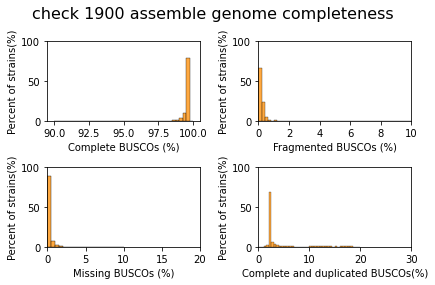

In [7]:
print(len(busco_result[busco_result["C(%)"]>95]))
# plt.figure(figsize=())
plt.suptitle("check 1900 assemble genome completeness",fontsize=16)
plt.subplot(2,2,1)
plt.ylim((0,100))
sns.histplot(busco_result['C(%)'],color="darkorange",stat="percent",binrange=(90,100),binwidth=0.25)
# sns.kdeplot(busco_result['C(%)'], shade=True, bw=0.5, color="olive")
plt.xlabel('Complete BUSCOs (%)')
plt.ylabel('Percent of strains(%)')
# plt.yscale('log')

plt.subplot(2,2,2)
plt.xlim((0,10))
plt.ylim((0,100))
sns.histplot(busco_result['F(%)'],color="darkorange",stat="percent",binrange=(0,10),binwidth=0.2)
plt.xlabel('Fragmented BUSCOs (%)')
plt.ylabel('Percent of strains(%)')
# plt.yscale('log')

plt.subplot(2,2,3)
plt.xlim((0,20))
plt.ylim((0,100))
sns.histplot(busco_result['M(%)'],color="darkorange",stat="percent",binrange=(0,10),binwidth=0.5)
plt.xlabel('Missing BUSCOs (%)')
plt.ylabel('Percent of strains(%)')
# plt.yscale('log')

plt.subplot(2,2,4)
plt.xlim((0,30))
plt.ylim((0,100))
sns.histplot(busco_result['D(%)'],color="darkorange",stat="percent",binrange=(0,20),binwidth=0.5)
plt.xlabel('Complete and duplicated BUSCOs(%)')
plt.ylabel('Percent of strains(%)')

plt.tight_layout()
# plt.savefig('result/figures/lg_busco_scores.png')
plt.show()